In [1]:
import numpy as np
import matplotlib.pyplot as plt

# model 1.1-1.4 uniform response over space
## settings: 100 realization
## parameters:
0. penalty: False, True
1. spline spacing: 15, 10, 5
2. n_study (per group): 25, 50, 100
3. Poisson rate mu:
    (1) One group: 1, 0.1, 0.01;
    (2) Two groups: equal response: [1,1], [0.1, 0.1], [0.01, 0.01];
    (3) Two groups: unequal response: [1,2], [0.1, 0.2], [0.01, 0.02].

## results:
1. parameters: beta, eta, mu(per_voxel), gamma, mu_t(per_study)
2. measured by: Bias, Variance and MSE
3. Bias/Variance/MSE of beta/eta/mu/gamma is a vector of length X.shape[1]/n_voxel/Z.shape[1], so the scalar results plotted below are the mean of these vectors.

## model 1.1 one group, no covariates, uniform response over space

In [2]:
## load data from txt file
## input: whether to add Firth-type penalty
def load_data1(penalty):
    # read the data from summary.txt
    if penalty == False:
      file_name = 'one_group_no_covariates_no_penalty_summary.txt'
    else:
      file_name = 'one_group_no_covariates_with_penalty_summary.txt'
    eta_array, beta_array, mu_array = [], [], []
    with open(file_name) as f:
        #content = f.readlines()
        for line in f:
            if ':' in line:
                params, val = line.rstrip().split(':')
                if params == 'eta':
                    eta_list = [float(i) for i in val.split(',')]
                    eta_array.append(eta_list)
                elif params == 'beta':
                    beta_list = [float(i) for i in val.split(',')]
                    beta_array.append(beta_list)
                elif params == 'mu':
                    mu_list = [float(i) for i in val.split(',')]
                    mu_array.append(mu_list)
    eta_array, beta_array, mu_array = np.array(eta_array), np.array(beta_array), np.array(mu_array)
    # shape: (27, 3)
    # where 27 columns represent 3^3 hyperparameter combinations
    # 3 columns represent bias, variance, MSE
    return eta_array, beta_array, mu_array

In [3]:
## plots with same spline spacing
# mu: voxelwise estimated mu per study
# mu_t: studywise estimated mu_t per voxel
def fixed_spacing_plots1(spline_spacing, penalty):
    eta_array, beta_array, mu_array = load_data1(penalty)
    if spline_spacing == 15:
        first_row = 0
    elif spline_spacing == 10:
        first_row = 9
    elif spline_spacing == 5:
        first_row = 18

    params_list = [eta_array, beta_array, mu_array]
    params_name_list = ['eta', 'beta', 'mu']
    evaluation_list = ['Bias', 'Var', 'MSE']

    f, axs = plt.subplots(3,3,figsize=(15,15))
    axs = axs.ravel()
    x = [2,1,0]
    x_label = ['mu=1', 'mu=0.1', 'mu=0.01']
    for i in range(9):
        params_array, params_name, evaluation = params_list[i//3], params_name_list[i//3], evaluation_list[i%3]
        params_n_study_25 = params_array[first_row:first_row+3, i%3]
        params_n_study_50 = params_array[first_row+3:first_row+6, i%3]
        params_n_study_100 = params_array[first_row+6:first_row+9, i%3]
        
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(x_label)
        axs[i].plot(x, params_n_study_25, color='salmon', label = "n_study=25") 
        axs[i].plot(x, params_n_study_50, color='lightskyblue', label = "n_study=50") 
        axs[i].plot(x, params_n_study_100, color='limegreen', label = "n_study=100") 
        axs[i].legend()
        axs[i].title.set_text(evaluation + '(' + params_name + ')')


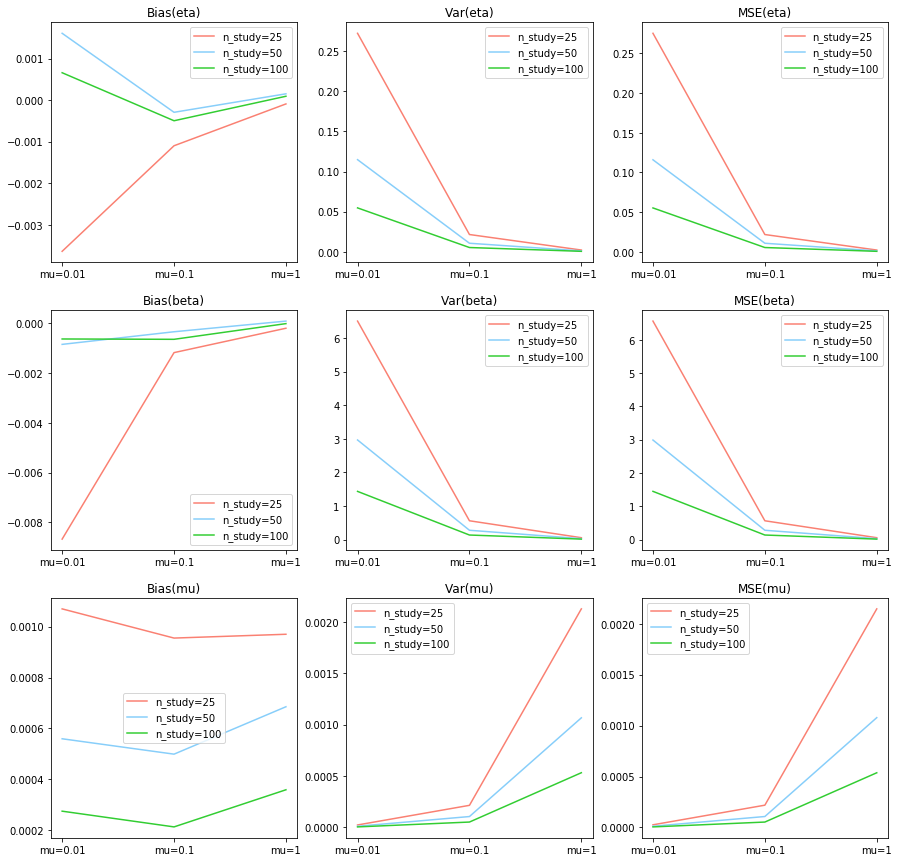

In [4]:
# input the fixed spline spacing here
spline_spacing = 5 #10 #15
penalty = False # True
fixed_spacing_plots1(spline_spacing, penalty)

In [5]:
## plots with fixed number of study (per group)
# mu: voxelwise estimated mu per study
# mu_t: studywise estimated mu_t per voxel

def fixed_n_study_plots1(n_study, penalty):
    eta_array, beta_array, mu_array = load_data1(penalty)
    row_index = (np.mod(np.arange(27),9)<3)
    if n_study == 25:
        row_index = (np.mod(np.arange(27),9)<3)
    elif n_study == 50:
        row_index = np.logical_and((np.mod(np.arange(27),9)>=3), (np.mod(np.arange(27),9)<6))
    elif n_study == 100:
        row_index = (np.mod(np.arange(27),9)>=6)

    params_list = [eta_array, beta_array, mu_array]
    params_name_list = ['eta', 'beta', 'mu']
    evaluation_list = ['Bias', 'Var', 'MSE']

    f, axs = plt.subplots(3,3,figsize=(15,15))
    axs = axs.ravel()
    x = ['mu=1', 'mu=0.1', 'mu=0.01']
    for i in range(9):
        params_array, params_name, evaluation = params_list[i//3], params_name_list[i//3], evaluation_list[i%3]
        params_array_fixed_n_study = params_array[row_index]
        params_spacing_15 = params_array_fixed_n_study[0:3, i%3]
        params_spacing_10 = params_array_fixed_n_study[3:6, i%3]
        params_spacing_5 = params_array_fixed_n_study[6:9, i%3]

        axs[i].plot(x, params_spacing_15, color='salmon', label = "spline_spacing=15") 
        axs[i].plot(x, params_spacing_10, color='lightskyblue', label = "spline_spacing=10") 
        axs[i].plot(x, params_spacing_5, color='limegreen', label = "spline_spacing=5")
        axs[i].legend()
        axs[i].title.set_text(evaluation + '(' + params_name + ')')


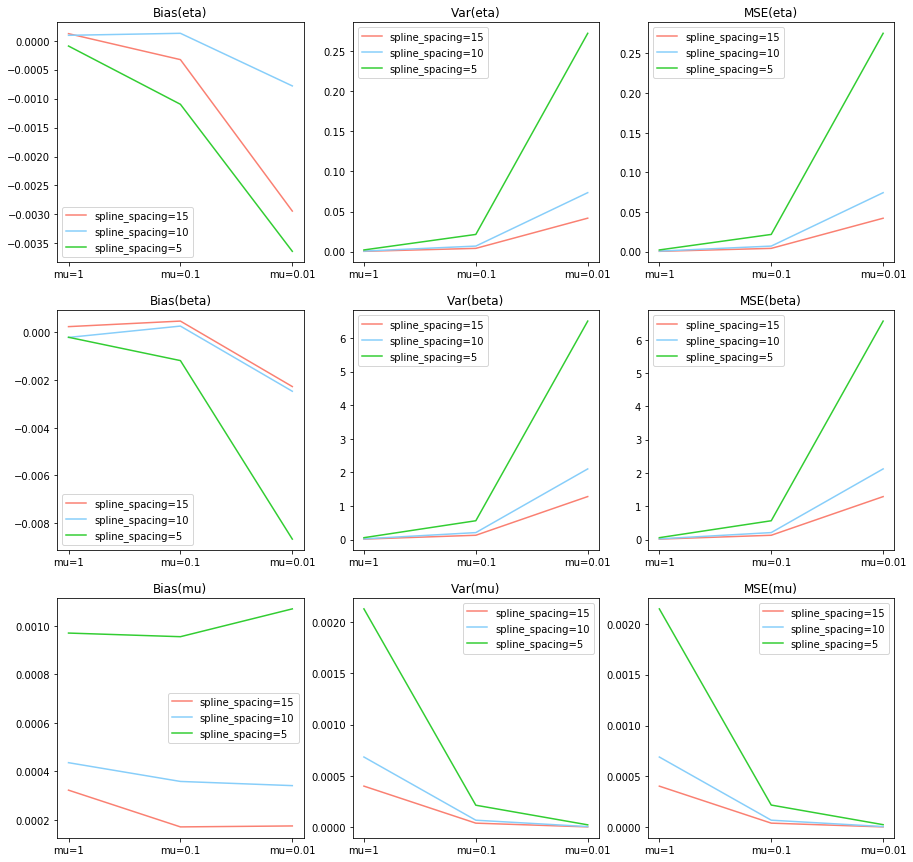

In [6]:
n_study = 25 #50 #100
penalty = False
fixed_n_study_plots1(n_study, penalty)

## model 1.2 one group, with 2 covariates, uniform response over space

In [7]:
## load data from txt file
## input: whether to add Firth-type penalty
def load_data2(penalty):
    # read the data from summary.txt
    if penalty == False:
      file_name = 'one_group_with_covariates_no_penalty_summary.txt'
    else:
      file_name = 'one_group_with_covariates_with_penalty_summary.txt'

    gamma_array, mu_t_array, beta_array, mu_array = [], [], [], []
    with open(file_name) as f:
        for line in f:
            if ':' in line:
                params, val = line.rstrip().split(':')
                if params == 'gamma':
                    gamma_list = [float(i) for i in val.split(',')]
                    gamma_array.append(gamma_list)
                elif params == 'mu_t':
                    mu_t_list = [float(i) for i in val.split(',')]
                    mu_t_array.append(mu_t_list)
                elif params == 'beta':
                    beta_list = [float(i) for i in val.split(',')]
                    beta_array.append(beta_list)
                elif params == 'mu':
                    mu_list = [float(i) for i in val.split(',')]
                    mu_array.append(mu_list)
    gamma_array, mu_t_array, beta_array, mu_array = np.array(gamma_array), np.array(mu_t_array), np.array(beta_array), np.array(mu_array)
    # shape: (27, 3)
    # where 27 columns represent 3^3 hyperparameter combinations
    # 3 columns represent bias, variance, MSE
    return gamma_array, mu_t_array, beta_array, mu_array

In [8]:
## plots with same spline spacing
# mu: voxelwise estimated mu per study
# mu_t: studywise estimated mu_t per voxel

def fixed_spacing_plots2(spline_spacing, penalty):
    gamma_array, mu_t_array, beta_array, mu_array = load_data2(penalty)
    if spline_spacing == 15:
        first_row = 0
    elif spline_spacing == 10:
        first_row = 9
    elif spline_spacing == 5:
        first_row = 18

    params_list = [gamma_array, mu_t_array, beta_array, mu_array]
    params_name_list = ['gamma', 'mu_t', 'beta', 'mu']
    evaluation_list = ['Bias', 'Var', 'MSE']

    f, axs = plt.subplots(4,3,figsize=(15,15))
    axs = axs.ravel()
    x = [2,1,0]
    x_label = ['mu=1', 'mu=0.1', 'mu=0.01']
    for i in range(12):
        params_array, params_name, evaluation = params_list[i//3], params_name_list[i//3], evaluation_list[i%3]
        params_n_study_25 = params_array[first_row:first_row+3, i%3]
        params_n_study_50 = params_array[first_row+3:first_row+6, i%3]
        params_n_study_100 = params_array[first_row+6:first_row+9, i%3]
        
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(x_label)
        axs[i].plot(x, params_n_study_25, color='salmon', label = "n_study=25") 
        axs[i].plot(x, params_n_study_50, color='lightskyblue', label = "n_study=50") 
        axs[i].plot(x, params_n_study_100, color='limegreen', label = "n_study=100") 
        axs[i].legend()
        axs[i].title.set_text(evaluation + '(' + params_name + ')')

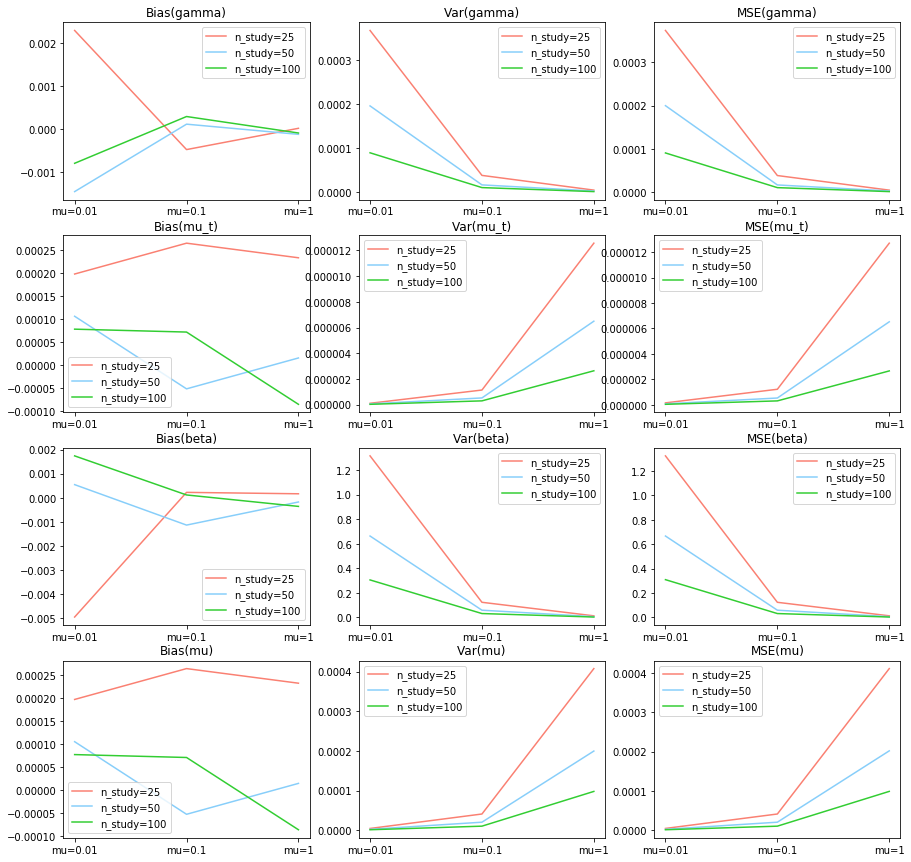

In [9]:
# input the fixed n_study here
spline_spacing = 15 #10 #5
penalty = True
fixed_spacing_plots2(spline_spacing, penalty)

In [10]:
## plots with fixed number of study (per group)
# mu: voxelwise estimated mu per study
# mu_t: studywise estimated mu_t per voxel

def fixed_n_study_plots2(n_study, penalty):
    gamma_array, mu_t_array, beta_array, mu_array = load_data2(penalty)
    row_index = (np.mod(np.arange(27),9)<3)
    if n_study == 25:
        row_index = (np.mod(np.arange(27),9)<3)
    elif n_study == 50:
        row_index = np.logical_and((np.mod(np.arange(27),9)>=3), (np.mod(np.arange(27),9)<6))
    elif n_study == 100:
        row_index = (np.mod(np.arange(27),9)>=6)
    params_list = [gamma_array, mu_t_array, beta_array, mu_array]
    params_name_list = ['gamma', 'mu_t', 'beta', 'mu']
    evaluation_list = ['Bias', 'Var', 'MSE']

    f, axs = plt.subplots(4,3,figsize=(15,15))
    axs = axs.ravel()
    x = ['mu=1', 'mu=0.1', 'mu=0.01']
    for i in range(12):
        params_array, params_name, evaluation = params_list[i//3], params_name_list[i//3], evaluation_list[i%3]
        params_array_fixed_n_study = params_array[row_index]
        params_spacing_15 = params_array_fixed_n_study[0:3, i%3]
        params_spacing_10 = params_array_fixed_n_study[3:6, i%3]
        params_spacing_5 = params_array_fixed_n_study[6:9, i%3]
        
        axs[i].plot(x, params_spacing_15, color='salmon', label = "spline_spacing=15") 
        axs[i].plot(x, params_spacing_10, color='lightskyblue', label = "spline_spacing=10") 
        axs[i].plot(x, params_spacing_5, color='limegreen', label = "spline_spacing=5")
        axs[i].legend()
        axs[i].title.set_text(evaluation + '(' + params_name + ')')


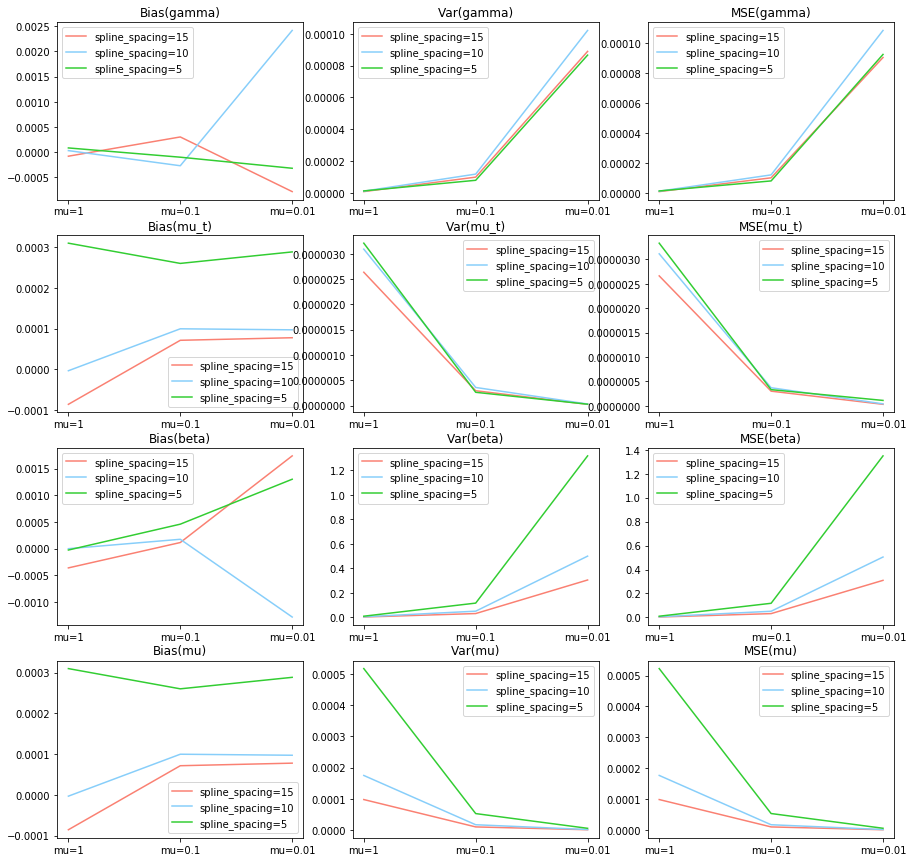

In [11]:
# input the fixed n_study here
n_study = 100 #50 #25
penalty = True
fixed_n_study_plots2(n_study, penalty)

## model 1.3: two groups, no covariates: uniform response over space

## model 1.4: two groups, with covariates: uniform response over space

In [12]:
## load data from txt file
## input: whether to add Firth-type penalty
def load_data4(penalty):
    # read the data from summary.txt
    if penalty == False:
      file_name = 'multiple_group_with_covariates_no_penalty_summary.txt'
    else:
      file_name = 'multiple_group_with_covariates_with_penalty_summary.txt'
    beta1_array, beta2_array, gamma_array = [], [], []
    mu_group1_per_study_array, mu_group2_per_study_array, mu_t_per_voxel_array = [], [], []
    with open(file_name) as f:
        for line in f:
            if ':' in line:
                params, val = line.rstrip().split(':')
                if params == 'beta1':
                    beta1_list = [float(i) for i in val.split(',')]
                    beta1_array.append(beta1_list)
                elif params == 'beta2':
                    beta2_list = [float(i) for i in val.split(',')]
                    beta2_array.append(beta2_list)
                elif params == 'gamma':
                    gamma_list = [float(i) for i in val.split(',')]
                    gamma_array.append(gamma_list)
                elif params == 'mu_group1_per_study':
                    mu1_list = [float(i) for i in val.split(',')]
                    mu_group1_per_study_array.append(mu1_list)
                elif params == 'mu_group2_per_study':
                    mu2_list = [float(i) for i in val.split(',')]
                    mu_group2_per_study_array.append(mu2_list)
                elif params == 'mu_t_per_voxel':
                    mu_t_list = [float(i) for i in val.split(',')]
                    mu_t_per_voxel_array.append(mu_t_list)
    beta1_array, beta2_array, gamma_array = np.array(beta1_array), np.array(beta2_array), np.array(gamma_array)
    mu_group1_per_study_array, mu_group2_per_study_array, mu_t_per_voxel_array = np.array(mu_group1_per_study_array), np.array(mu_group2_per_study_array), np.array(mu_t_per_voxel_array)
    # shape: (27, 3)
    # where 27 columns represent 3^3 hyperparameter combinations
    # 3 columns represent bias, variance, MSE
    return beta1_array, beta2_array, gamma_array, mu_group1_per_study_array, mu_group2_per_study_array, mu_t_per_voxel_array


In [13]:
## plots with same spline spacing
# mu: voxelwise estimated mu per study
# mu_t: studywise estimated mu_t per voxel

def fixed_spacing_plots4(spline_spacing, penalty):
    beta1_array, beta2_array, gamma_array, mu_group1_array, mu_group2_array, mu_t_array = load_data4(penalty) 
    
    if spline_spacing == 15:
        first_row = 0
    elif spline_spacing == 10:
        first_row = 9
    elif spline_spacing == 5:
        first_row = 18

    params_list = [beta1_array, beta2_array, gamma_array, mu_group1_array, mu_group2_array, mu_t_array]
    params_name_list = ['beta1', 'beta2', 'gamma', 'mu1', 'mu2', 'mu_t']
    evaluation_list = ['Bias', 'Var', 'MSE']

    f, axs = plt.subplots(6,3,figsize=(15,20))
    axs = axs.ravel()
    x = [2,1,0]
    x_label = ['mu=1', 'mu=0.1', 'mu=0.01']
    for i in range(18):
        params_array, params_name, evaluation = params_list[i//3], params_name_list[i//3], evaluation_list[i%3]
        params_n_study_25 = params_array[first_row:first_row+3, i%3]
        params_n_study_50 = params_array[first_row+3:first_row+6, i%3]
        params_n_study_100 = params_array[first_row+6:first_row+9, i%3]
        
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(x_label)
        axs[i].plot(x, params_n_study_25, color='salmon', label = "n_study=25") 
        axs[i].plot(x, params_n_study_50, color='lightskyblue', label = "n_study=50") 
        axs[i].plot(x, params_n_study_100, color='limegreen', label = "n_study=100") 
        axs[i].legend()
        axs[i].title.set_text(evaluation + '(' + params_name + ')')

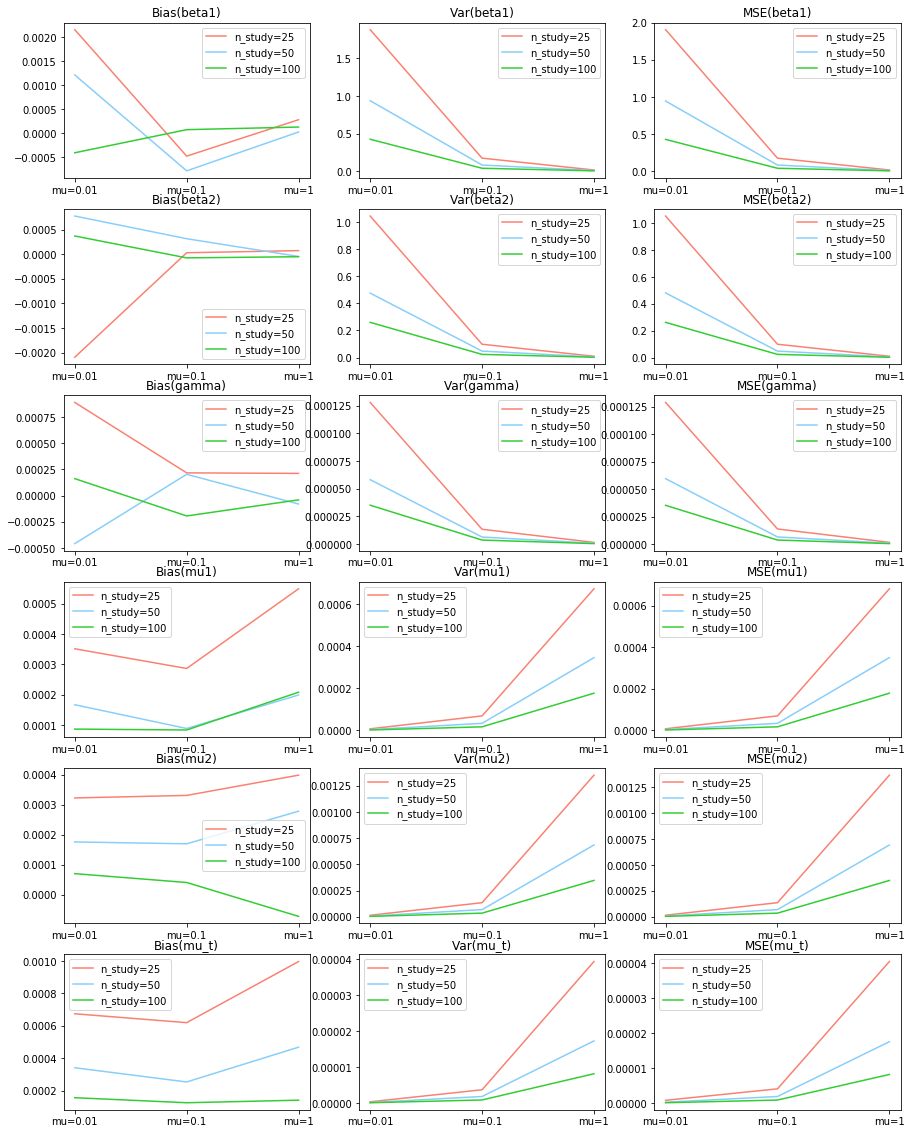

In [14]:
spline_spacing = 10 #15
penalty = False
fixed_spacing_plots4(spline_spacing, penalty)

In [15]:
## plots with fixed number of study (per group)
# mu: voxelwise estimated mu per study
# mu_t: studywise estimated mu_t per voxel

def fixed_n_study_plots4(n_study, penalty):
    beta1_array, beta2_array, gamma_array, mu_group1_array, mu_group2_array, mu_t_array = load_data4(penalty) 
    row_index = (np.mod(np.arange(27),9)<3)
    if n_study == 25:
        row_index = (np.mod(np.arange(27),9)<3)
    elif n_study == 50:
        row_index = np.logical_and((np.mod(np.arange(27),9)>=3), (np.mod(np.arange(27),9)<6))
    elif n_study == 100:
        row_index = (np.mod(np.arange(27),9)>=6)
    params_list = [gamma_array, mu_t_array, beta_array, mu_array]
    params_name_list = params_name_list = ['beta1', 'beta2', 'gamma', 'mu1', 'mu2', 'mu_t']
    evaluation_list = ['Bias', 'Var', 'MSE']

    f, axs = plt.subplots(6,3,figsize=(15,20))
    axs = axs.ravel()
    x = ['mu=1', 'mu=0.1', 'mu=0.01']
    for i in range(18):
        params_array, params_name, evaluation = params_list[i//3], params_name_list[i//3], evaluation_list[i%3]
        params_array_fixed_n_study = params_array[row_index]
        params_spacing_15 = params_array_fixed_n_study[0:3, i%3]
        params_spacing_10 = params_array_fixed_n_study[3:6, i%3]
        params_spacing_5 = params_array_fixed_n_study[6:9, i%3]
        
        axs[i].plot(x, params_spacing_15, color='salmon', label = "spline_spacing=15") 
        axs[i].plot(x, params_spacing_10, color='lightskyblue', label = "spline_spacing=10") 
        axs[i].plot(x, params_spacing_5, color='limegreen', label = "spline_spacing=5")
        axs[i].legend()
        axs[i].title.set_text(evaluation + '(' + params_name + ')')
